In [31]:
import os
import sys
import warnings

# warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = Warning)

# if not sys.warnoptions:
#     warnings.simplefilter("ignore")
#     os.environ["PYTHONWARNINGS"] = "ignore"

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import RidgeCV, LinearRegression
from xgboost import XGBRegressor

In [33]:
SEED = 73

np.random.seed = SEED
tf.random.set_seed(SEED)

In [34]:
data = pd.read_csv('../data/hotels_ppp.csv', sep=',')
data.head(7)

,Регион,Год,Доходы гостиниц и аналогичных средств размещения,Число гостиниц и средств размещения,Численность размещенных лиц в гостиницах и ананлогичных средствах размещения,Число ночевок в гостиницах и ананлогичных средствах размещения,"Средняя численность работников, включая внешних совместителей",Число туристских фирм,"Средства, поступившие от реализации туристкого продукта",Число реализованных турпакетов населению
0,Ханты-Мансийский автономный округ - Югра (Тюме...,2002,NaN,NaN,NaN,NaN,308.0,40.0,NaN,NaN
1,Ханты-Мансийский автономный округ - Югра (Тюме...,2004,NaN,NaN,NaN,NaN,208.0,37.0,NaN,NaN
2,Ханты-Мансийский автономный округ - Югра (Тюме...,2005,NaN,NaN,NaN,NaN,223.0,43.0,NaN,NaN
3,Ханты-Мансийский автономный округ - Югра (Тюме...,2006,NaN,NaN,NaN,NaN,277.0,48.0,NaN,NaN
4,Ханты-Мансийский автономный округ - Югра (Тюме...,2007,NaN,NaN,NaN,NaN,361.0,62.0,NaN,NaN
5,Ханты-Мансийский автономный округ - Югра (Тюме...,2008,NaN,NaN,NaN,NaN,361.0,67.0,NaN,NaN
6,Ханты-Мансийский автономный округ - Югра (Тюме...,2009,NaN,NaN,NaN,NaN,207.0,51.0,NaN,NaN


In [35]:
df = data[data['Регион'] == 'Ханты-Мансийский автономный округ - Югра (Тюменская область)']
view_data = df['Средняя численность работников, включая внешних совместителей']
view_data.index = df['Год']
view_data

Год
2002    308.0
2004    208.0
2005    223.0
2006    277.0
2007    361.0
2008    361.0
2009    207.0
2010    345.0
2011    325.0
2012    436.0
2013    500.0
2014    553.0
2015    370.0
2016      NaN
2017      NaN
2018      NaN
2019      NaN
Name: Средняя численность работников, включая внешних совместителей, dtype: float64

<AxesSubplot: xlabel='Год'>

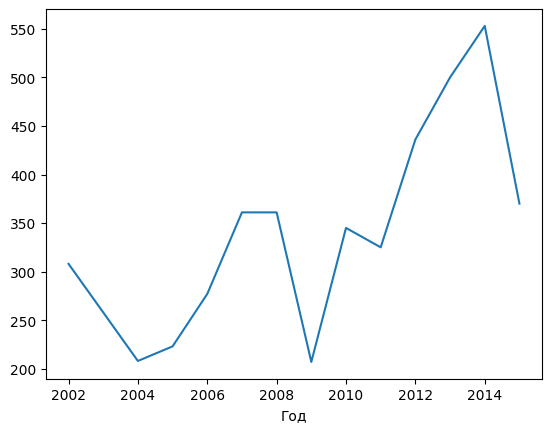

In [36]:
view_data.plot()

In [37]:
alta = data.groupby(['Регион', 'Год']).first().loc['Алтайский край']
alta

,Доходы гостиниц и аналогичных средств размещения,Число гостиниц и средств размещения,Численность размещенных лиц в гостиницах и ананлогичных средствах размещения,Число ночевок в гостиницах и ананлогичных средствах размещения,"Средняя численность работников, включая внешних совместителей",Число туристских фирм,"Средства, поступившие от реализации туристкого продукта",Число реализованных турпакетов населению
Год,,,,,,,,
2002,NaN,NaN,NaN,NaN,228.0,44.0,NaN,NaN
2004,NaN,NaN,NaN,NaN,305.0,56.0,NaN,NaN
2005,NaN,NaN,NaN,NaN,375.0,76.0,NaN,NaN
2006,NaN,NaN,NaN,NaN,435.0,77.0,NaN,NaN
2007,NaN,NaN,NaN,NaN,453.0,87.0,NaN,NaN
2008,NaN,NaN,NaN,NaN,479.0,100.0,NaN,NaN
2009,NaN,NaN,NaN,NaN,413.0,95.0,NaN,NaN
2010,725600.30,155.0,284060.99,521508.99,427.0,110.0,NaN,25926.00
2011,847640.30,167.0,304891.00,552745.99,455.0,121.0,832542.40,28654.99


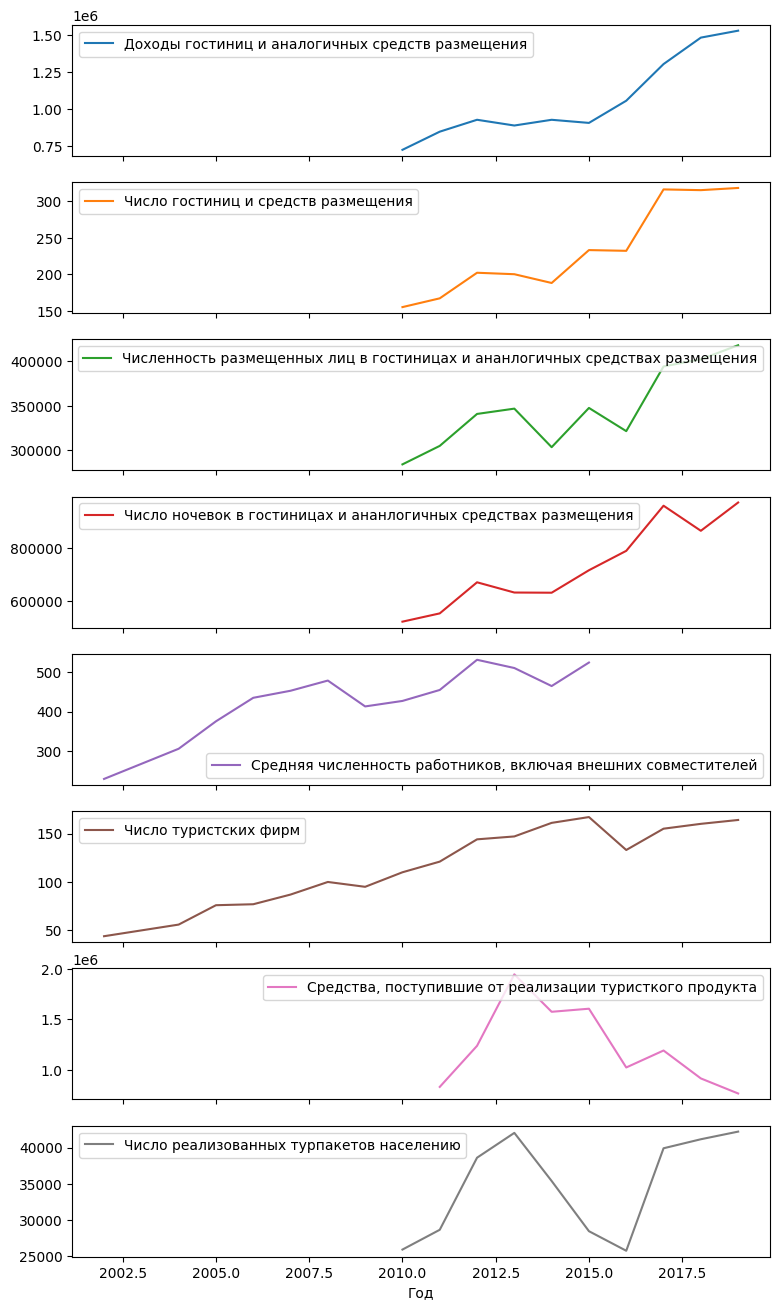

In [38]:
# fig, ax = plt.subplots(8, 1, figsize=(9, 16))
alta.plot(subplots=True, figsize=(9, 16));

In [39]:
buf = alta.copy()

## RidgeCV

In [40]:
alta.corr()

,Доходы гостиниц и аналогичных средств размещения,Число гостиниц и средств размещения,Численность размещенных лиц в гостиницах и ананлогичных средствах размещения,Число ночевок в гостиницах и ананлогичных средствах размещения,"Средняя численность работников, включая внешних совместителей",Число туристских фирм,"Средства, поступившие от реализации туристкого продукта",Число реализованных турпакетов населению
Доходы гостиниц и аналогичных средств размещения,1.000000,0.955236,0.915589,0.927206,0.762292,0.593709,-0.580974,0.627459
Число гостиниц и средств размещения,0.955236,1.000000,0.948717,0.975225,0.893558,0.665125,-0.423769,0.591570
Численность размещенных лиц в гостиницах и ананлогичных средствах размещения,0.915589,0.948717,1.000000,0.902753,0.970206,0.694530,-0.332899,0.748568
Число ночевок в гостиницах и ананлогичных средствах размещения,0.927206,0.975225,0.902753,1.000000,0.905122,0.635494,-0.445246,0.535437
"Средняя численность работников, включая внешних совместителей",0.762292,0.893558,0.970206,0.905122,1.000000,0.850570,0.434134,0.586324
Число туристских фирм,0.593709,0.665125,0.694530,0.635494,0.850570,1.000000,0.266582,0.612933
"Средства, поступившие от реализации туристкого продукта",-0.580974,-0.423769,-0.332899,-0.445246,0.434134,0.266582,1.000000,0.080918
Число реализованных турпакетов населению,0.627459,0.591570,0.748568,0.535437,0.586324,0.612933,0.080918,1.000000


<AxesSubplot: >

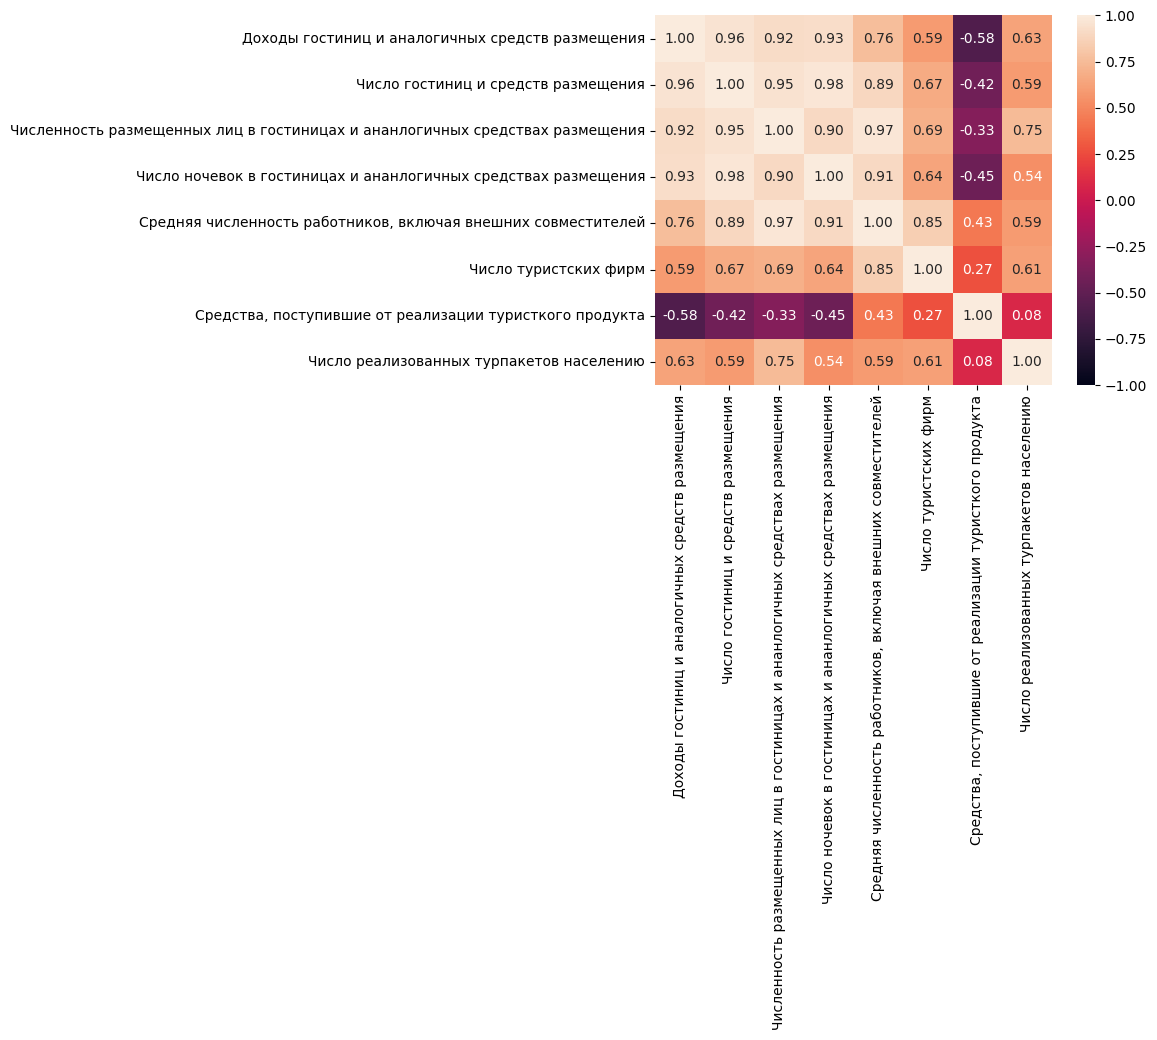

In [41]:
sns.heatmap(alta.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f')

In [42]:
alta = alta.loc[:2015]
for col in alta.columns:
    # alta[col] = alta[col].fillna(alta[col].mean())  # 0.78
    alta[col] = alta[col].fillna(0)  # 0.89
display(alta)

,Доходы гостиниц и аналогичных средств размещения,Число гостиниц и средств размещения,Численность размещенных лиц в гостиницах и ананлогичных средствах размещения,Число ночевок в гостиницах и ананлогичных средствах размещения,"Средняя численность работников, включая внешних совместителей",Число туристских фирм,"Средства, поступившие от реализации туристкого продукта",Число реализованных турпакетов населению
Год,,,,,,,,
2002,0.0,0.0,0.00,0.00,228.0,44.0,0.0,0.00
2004,0.0,0.0,0.00,0.00,305.0,56.0,0.0,0.00
2005,0.0,0.0,0.00,0.00,375.0,76.0,0.0,0.00
2006,0.0,0.0,0.00,0.00,435.0,77.0,0.0,0.00
2007,0.0,0.0,0.00,0.00,453.0,87.0,0.0,0.00
2008,0.0,0.0,0.00,0.00,479.0,100.0,0.0,0.00
2009,0.0,0.0,0.00,0.00,413.0,95.0,0.0,0.00
2010,725600.3,155.0,284060.99,521508.99,427.0,110.0,0.0,25926.00
2011,847640.3,167.0,304891.00,552745.99,455.0,121.0,832542.4,28654.99


In [43]:
X = np.array(alta.drop(columns=['Средняя численность работников, включая внешних совместителей']))
y = np.array(alta['Средняя численность работников, включая внешних совместителей'])

In [44]:
scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [45]:
params = {
    'cv': [None, 2, 3, 4, 5],
}

model = GridSearchCV(RidgeCV(), params).fit(X, y)
model.score(X, y), model.best_params_, model.best_score_

(0.8944755771297696, {'cv': 2}, -27.124208264591573)

cv=None:

0.89, scaler=0.85

cv=3:

0.91, scaler=0.77

cv=5:

0.93, scaler=0.57

### Дерево

## Временные ряды

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from datetime import timedelta

### Смотрины

In [47]:
alta = buf.copy()
alta.rename(index={2002: 2003}, inplace=True)
alta.index = pd.to_datetime(alta.index, format='%Y')
alta = alta['Средняя численность работников, включая внешних совместителей']
alta

Год
2003-01-01    228.0
2004-01-01    305.0
2005-01-01    375.0
2006-01-01    435.0
2007-01-01    453.0
2008-01-01    479.0
2009-01-01    413.0
2010-01-01    427.0
2011-01-01    455.0
2012-01-01    532.0
2013-01-01    511.0
2014-01-01    465.0
2015-01-01    525.0
2016-01-01      NaN
2017-01-01      NaN
2018-01-01      NaN
2019-01-01      NaN
Name: Средняя численность работников, включая внешних совместителей, dtype: float64

In [48]:
alta.rolling(window = 3).mean()

Год
2003-01-01           NaN
2004-01-01           NaN
2005-01-01    302.666667
2006-01-01    371.666667
2007-01-01    421.000000
2008-01-01    455.666667
2009-01-01    448.333333
2010-01-01    439.666667
2011-01-01    431.666667
2012-01-01    471.333333
2013-01-01    499.333333
2014-01-01    502.666667
2015-01-01    500.333333
2016-01-01           NaN
2017-01-01           NaN
2018-01-01           NaN
2019-01-01           NaN
Name: Средняя численность работников, включая внешних совместителей, dtype: float64

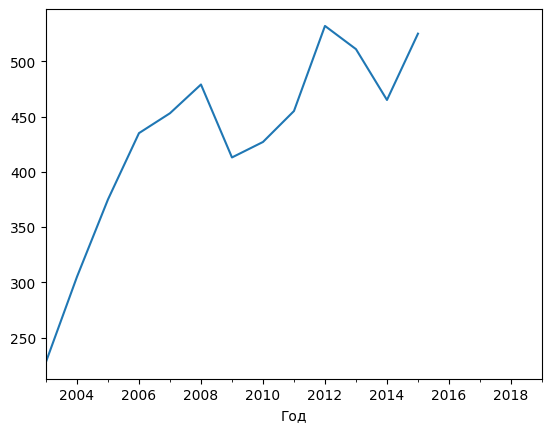

In [49]:
alta.plot();

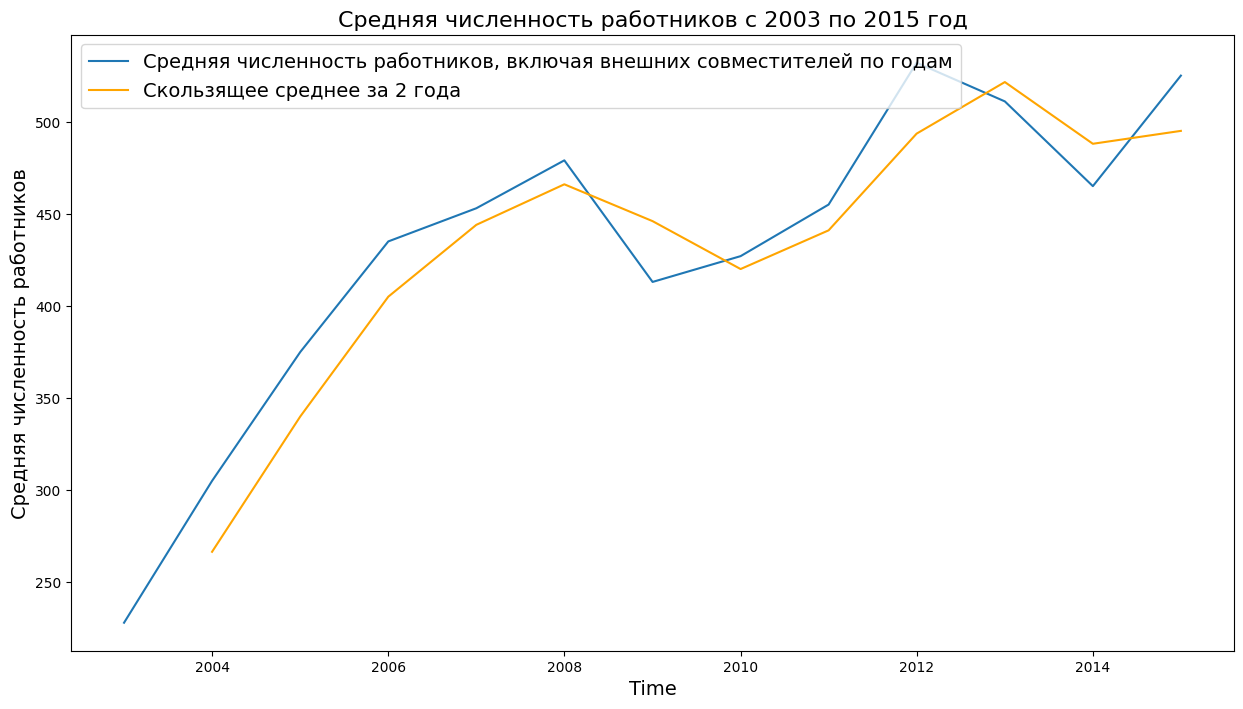

In [50]:
plt.figure(figsize = (15,8))
plt.plot(alta, label='Средняя численность работников, включая внешних совместителей по годам')
plt.plot(alta.rolling(window=2).mean(), label='Скользящее среднее за 2 года', color='orange')
plt.legend(title = '', loc = 'upper left', fontsize = 14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Средняя численность работников', fontsize=14)
plt.title('Средняя численность работников с 2003 по 2015 год', fontsize=16)
plt.show()

In [51]:
alta = alta['2003':'2015']

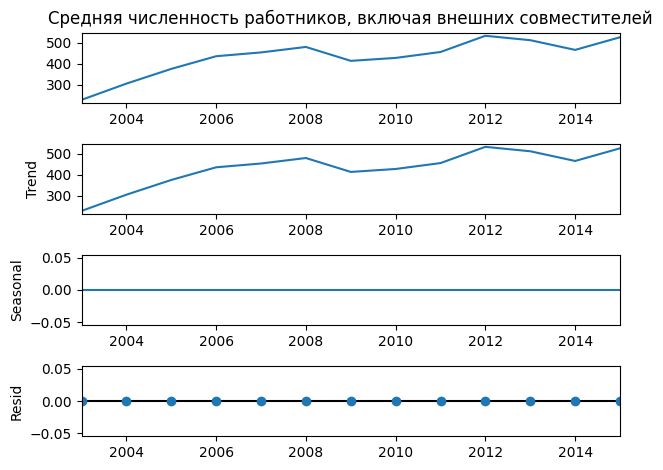

In [52]:
decompose = seasonal_decompose(alta)
decompose.plot()
plt.show()

Тест Дики-Фуллера

Нулевая гипотеза предполагает, что процесс нестационарный

Иначе - стационарный

In [53]:
adf_test = adfuller(alta)
print('p-value = ' + str(adf_test[1]))

p-value = 0.05446249132712218


Если взять пороговое значение 5%, то можем сказать, что процесс нестационарен

In [54]:
lag_1 = alta[1:]
print('Автокорреляция ряда с лагом 1:', np.round(np.corrcoef(alta[:-1], lag_1)[0,1], 2))
np.corrcoef(alta[:-1], lag_1)

Автокорреляция ряда с лагом 1: 0.83


array([[1.       , 0.8313821],
       [0.8313821, 1.       ]])

Text(0.5, 1.0, 'Автокорреляция с лагом 1')

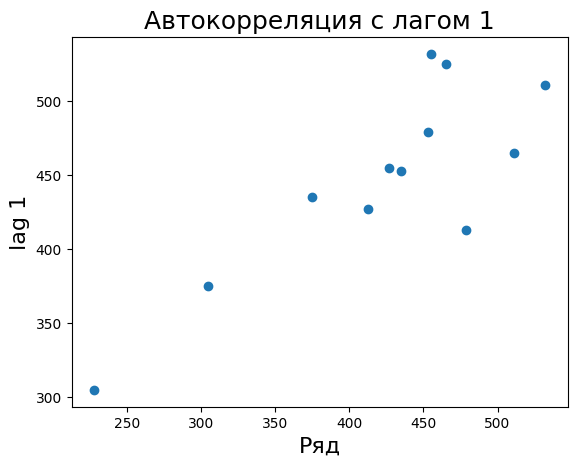

In [55]:
plt.scatter(alta[:-1], lag_1)
plt.xlabel('Ряд', fontsize = 16)
plt.ylabel('lag 1', fontsize = 16)
plt.title('Автокорреляция с лагом 1', fontsize = 18)

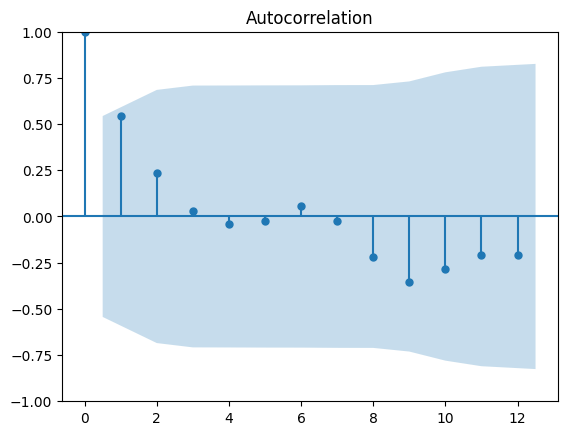

In [56]:
plot_acf(alta)
plt.show()

Видно что из границы выходит только первый столбик, т.е. лучше использовать автокорреляцию ряда с самим собой

### Экспоненциальное сглаживание

In [57]:
alta = buf.copy()
alta.rename(index={2002: 2003}, inplace=True)
alta.index = pd.to_datetime(alta.index, format='%Y')
alta = alta['Средняя численность работников, включая внешних совместителей']
alta = alta['2003':'2015']
alta = pd.DataFrame(alta)
name = 'Средняя численность работников, включая внешних совместителей'

,"Средняя численность работников, включая внешних совместителей",Exp_smoothing
Год,,
2011-01-01,455.0,441.777344
2012-01-01,532.0,486.888672
2013-01-01,511.0,498.944336
2014-01-01,465.0,481.972168
2015-01-01,525.0,503.486084


last_date=DatetimeIndex(['2016-01-01'], dtype='datetime64[ns]', name='Год', freq=None)


,"Средняя численность работников, включая внешних совместителей",Exp_smoothing
Год,,
2012-01-01,532.0,486.888672
2013-01-01,511.0,498.944336
2014-01-01,465.0,481.972168
2015-01-01,525.0,503.486084
2016-01-01,NaN,NaN


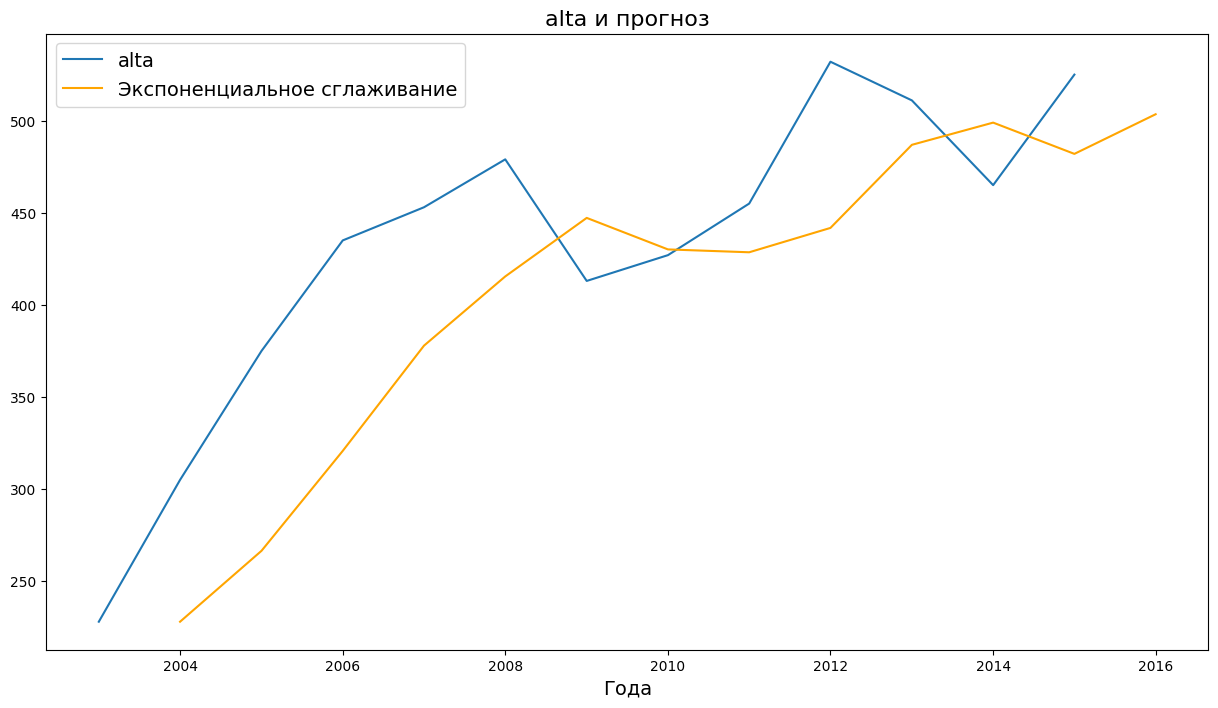

In [58]:
alpha = 0.5

# первое значение совпадает со значением временного ряда
exp_smoothing = [alta[name][0]]

for i in range(1, len(alta[name])):
    exp_smoothing.append(
        alpha * alta[name][i] + (1 - alpha) * exp_smoothing[i - 1])

# теперь сдвигаем второй столбец на один вперед (ведь это прогноз)
alta['Exp_smoothing'] = exp_smoothing
display(alta.tail())

last_date = alta.iloc[[-1]].index
last_date = last_date + timedelta(days=365*1)
print(f'{last_date=}')
alta = alta.append(pd.DataFrame(index=last_date))
display(alta.tail())

alta['Exp_smoothing'] = alta['Exp_smoothing'].shift(1)

plt.figure(figsize=(15, 8))
plt.plot(alta['Средняя численность работников, включая внешних совместителей'], label='alta')
plt.plot(alta['Exp_smoothing'], label='Экспоненциальное сглаживание', color='orange')

plt.legend(title='', loc='upper left', fontsize=14)

plt.xlabel('Года', fontsize=14)
plt.title('alta и прогноз', fontsize=16)
plt.show()

### SARIMAX

In [59]:
alta = buf.copy()
alta.rename(index={2002: 2003}, inplace=True)
alta.index = pd.to_datetime(alta.index, format='%Y')
alta = pd.DataFrame(alta['Средняя численность работников, включая внешних совместителей'])
name = 'Средняя численность работников, включая внешних совместителей'
alta

,"Средняя численность работников, включая внешних совместителей"
Год,
2003-01-01,228.0
2004-01-01,305.0
2005-01-01,375.0
2006-01-01,435.0
2007-01-01,453.0
2008-01-01,479.0
2009-01-01,413.0
2010-01-01,427.0
2011-01-01,455.0


In [60]:
train = alta[:'2013']
test = alta['2014':'2015']

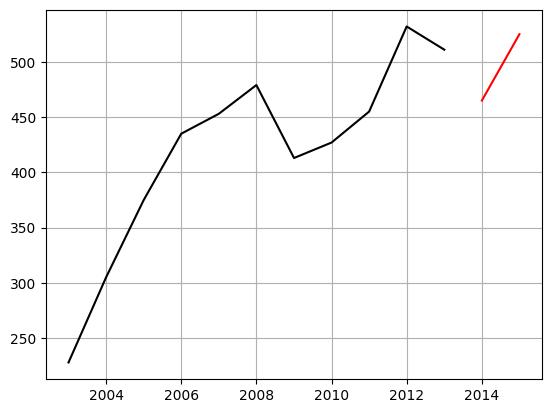

In [61]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.grid()
plt.show()

In [62]:
parameter_search = auto_arima(train, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                              d=None, D=0, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
parameter_search.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=130.501, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=132.896, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=166.509, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=126.353, Time=0.14 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=127.308, Time=0.41 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=129.380, Time=0.42 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=129.271, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=125.519, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=127.450, Time=0.38 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=125.147, Time=0.14 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=inf, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   11
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -58.573
Date:                Thu, 06 Apr 2023   AIC                            125.147
Time:                        22:39:21   BIC                            126.739
Sample:                    01-01-2003   HQIC                           124.144
                         - 01-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     90.3355    114.529      0.789      0.430    -134.138     314.809
ar.L1          1.3099      0.349      3.754      0.000       0.626       1.994
ar.L2         -0.5401      0.475     -1.138      0.255      -1.470       0.390
sigma2      2055.6562   1531.318      1.342      0.179    -945.671    5056.984
===================================================================================
Ljung-Box (L1) (Q):                   2.06   Jarque-Bera (JB):                 0.68
Prob(Q):                              0.15   Prob(JB):                         0.71
Heteroskedasticity (H):               1.38   Skew:                            -0.45
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
model = SARIMAX(train, 
                order = (2, 0, 0), 
                seasonal_order = (0, 0, 0, 12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     SARIMAX Results                                                     
=========================================================================================================================
Dep. Variable:     Средняя численность работников, включая внешних совместителей   No. Observations:                   11
Model:                                                          SARIMAX(2, 0, 0)   Log Likelihood                 -60.249
Date:                                                           Thu, 06 Apr 2023   AIC                            126.497
Time:                                                                   22:39:22   BIC                            127.691
Sample:                                                               01-01-2003   HQIC                           125.745
                                                                    - 01-01-2013                                         
Covariance Type:                                                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4196      0.359      3.952      0.000       0.716       2.124
ar.L2         -0.4335      0.376     -1.152      0.249      -1.171       0.304
sigma2      2252.2679   1678.482      1.342      0.180   -1037.496    5542.032
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):                 1.58
Prob(Q):                              0.40   Prob(JB):                         0.45
Heteroskedasticity (H):               1.18   Skew:                            -0.93
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
start = len(train)
end = len(train) + len(test) - 1

predictions = result.predict(start, end)
predictions

2014-01-01    494.79405
2015-01-01    480.89142
Freq: AS-JAN, Name: predicted_mean, dtype: float64

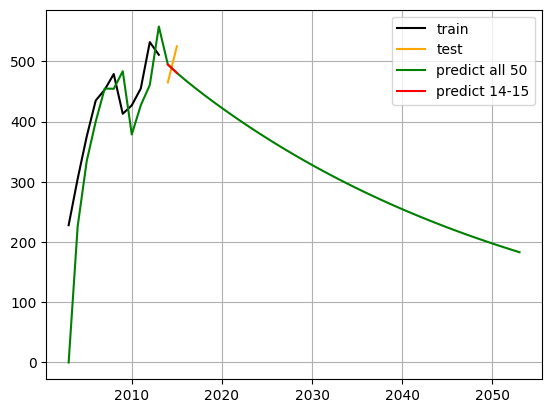

In [65]:
plt.plot(train, color='black', label='train')
plt.plot(test, color='orange', label='test')
plt.plot(result.predict(0, 50), color='green', label='predict all 50')
plt.plot(predictions, color='r', label='predict 14-15')
plt.legend()
plt.grid()
plt.show()

In [66]:
forecast = result.predict(start, end+20)
forecast

2014-01-01    494.794050
2015-01-01    480.891420
2016-01-01    468.180451
2017-01-01    456.162715
2018-01-01    444.612524
2019-01-01    433.425552
2020-01-01    422.551527
2021-01-01    411.964310
2022-01-01    401.648581
2023-01-01    391.593928
2024-01-01    381.792208
2025-01-01    372.236375
2026-01-01    362.919956
2027-01-01    353.836820
2028-01-01    344.981063
2029-01-01    336.346968
2030-01-01    327.928974
2031-01-01    319.721668
2032-01-01    311.719773
2033-01-01    303.918148
2034-01-01    296.311780
2035-01-01    288.895782
Freq: AS-JAN, Name: predicted_mean, dtype: float64

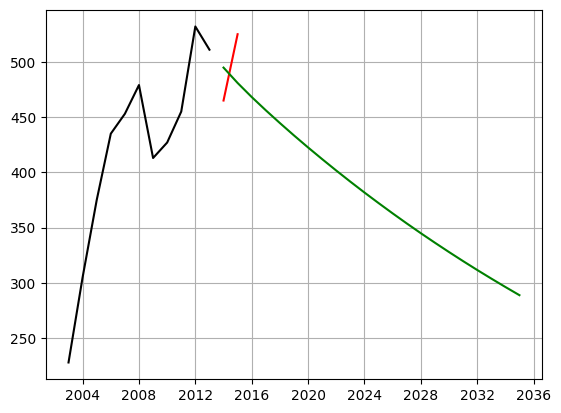

In [67]:
plt.plot(train, color = 'black')
plt.plot(test, color = 'red')
plt.plot(forecast, color = 'green')
plt.grid()
plt.show()

## Размножить значения + SARIMAX

In [68]:
alta = buf.copy()
alta.rename(index={2002: 2003}, inplace=True)
alta.index = pd.to_datetime(alta.index, format='%Y')
name = 'Средняя численность работников, включая внешних совместителей'
alta = pd.DataFrame(alta[name])
alta

,"Средняя численность работников, включая внешних совместителей"
Год,
2003-01-01,228.0
2004-01-01,305.0
2005-01-01,375.0
2006-01-01,435.0
2007-01-01,453.0
2008-01-01,479.0
2009-01-01,413.0
2010-01-01,427.0
2011-01-01,455.0


'linear', 'time', 'index', 'values', 'nearest', 'zero',
'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh',
'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial',
'pchip', 'akima', 'cubicspline'

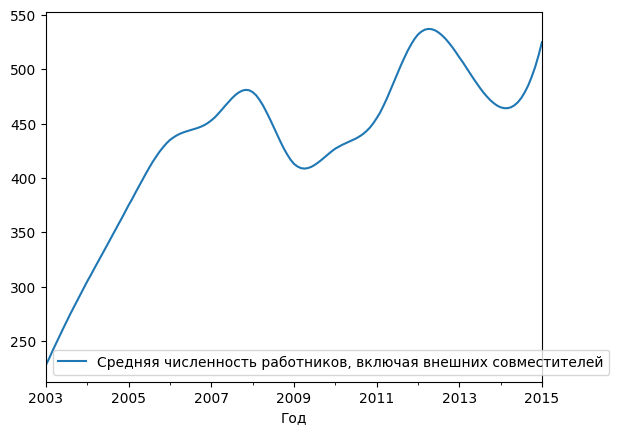

In [69]:
# alta_e = alta[:'2015'].asfreq(freq='D').interpolate(method='polynomial', order=2)
# alta_e = alta[:'2015'].resample('M').mean().interpolate(method='polynomial', order=2)
alta_e = alta[:'2015'].resample('M').mean().interpolate(method='cubic')
alta_e.plot();

In [70]:
alta_e.head(), alta_e.tail()

(            Средняя численность работников, включая внешних совместителей
 Год                                                                      
 2003-01-31                                         228.000000            
 2003-02-28                                         234.521066            
 2003-03-31                                         241.591397            
 2003-04-30                                         248.292989            
 2003-05-31                                         255.082052            ,
             Средняя численность работников, включая внешних совместителей
 Год                                                                      
 2014-09-30                                         485.117128            
 2014-10-31                                         492.947777            
 2014-11-30                                         501.901905            
 2014-12-31                                         512.651770            
 2015-01-31             

In [71]:
train = alta_e[:'2014-01']
test = alta_e['2014-01':]

In [72]:
parameter_search = auto_arima(train, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                              d=None, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
parameter_search.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.66 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=728.318, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=248.403, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=343.706, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.46 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.85 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=717.420, Time=0.07 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=124.599, Time=0.31 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=128.008, Time=0.11 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=126.429, Time=0.68 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=121.839, Time=0.53 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=116.133, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  133
Model:             SARIMAX(3, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood                 -20.332
Date:                                 Thu, 06 Apr 2023   AIC                             56.664
Time:                                         22:39:53   BIC                             78.964
Sample:                                     01-31-2003   HQIC                            65.720
                                          - 01-31-2014                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2614      0.089     14.207      0.000       1.087       1.435
ar.L2          0.3716      0.175      2.124      0.034       0.029       0.715
ar.L3         -0.6621      0.094     -7.047      0.000      -0.846      -0.478
ar.S.L12      -0.5185      0.335     -1.546      0.122      -1.176       0.139
ar.S.L24       0.2855      0.153      1.862      0.063      -0.015       0.586
ma.S.L12      -0.2114      0.420     -0.503      0.615      -1.035       0.612
ma.S.L24      -0.4896      0.225     -2.172      0.030      -0.931      -0.048
sigma2         0.0695      0.007      9.583      0.000       0.055       0.084
===================================================================================
Ljung-Box (L1) (Q):                   1.45   Jarque-Bera (JB):                34.46
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               3.87   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
params = parameter_search.get_params()

model = SARIMAX(train,
                order = params['order'], 
                seasonal_order = params['seasonal_order'])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     SARIMAX Results                                                     
=========================================================================================================================
Dep. Variable:     Средняя численность работников, включая внешних совместителей   No. Observations:                  133
Model:                                       SARIMAX(3, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood                 -20.332
Date:                                                           Thu, 06 Apr 2023   AIC                             56.664
Time:                                                                   22:39:55   BIC                             78.964
Sample:                                                               01-31-2003   HQIC                            65.720
                                                                    - 01-31-2014                                         
Covariance Type:                                                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2614      0.089     14.207      0.000       1.087       1.435
ar.L2          0.3716      0.175      2.124      0.034       0.029       0.715
ar.L3         -0.6621      0.094     -7.047      0.000      -0.846      -0.478
ar.S.L12      -0.5185      0.335     -1.546      0.122      -1.176       0.139
ar.S.L24       0.2855      0.153      1.862      0.063      -0.015       0.586
ma.S.L12      -0.2114      0.420     -0.503      0.615      -1.035       0.612
ma.S.L24      -0.4896      0.225     -2.172      0.030      -0.931      -0.048
sigma2         0.0695      0.007      9.583      0.000       0.055       0.084
===================================================================================
Ljung-Box (L1) (Q):                   1.45   Jarque-Bera (JB):                34.46
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               3.87   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
train.head(4)

,"Средняя численность работников, включая внешних совместителей"
Год,
2003-01-31,228.000000
2003-02-28,234.521066
2003-03-31,241.591397
2003-04-30,248.292989


In [75]:
result.predict(0, 4)[1:]

Год
2003-02-28    228.002611
2003-03-31    234.523738
2003-04-30    241.594083
2003-05-31    248.295624
Freq: M, Name: predicted_mean, dtype: float64

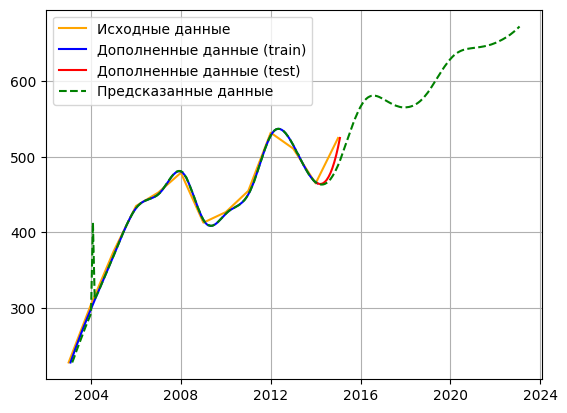

In [76]:
start = 0
end = start + 12 * 20
forecast = result.predict(start, end)[1:]

plt.plot(alta, color='orange', label='Исходные данные')
plt.plot(train, color='b', label='Дополненные данные (train)')
plt.plot(test, color='r', label='Дополненные данные (test)')
plt.plot(forecast, color='g', linestyle='--', label='Предсказанные данные')
plt.legend()
plt.grid()
plt.show()